+++ Point 0 +++ Org df after filling
   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               

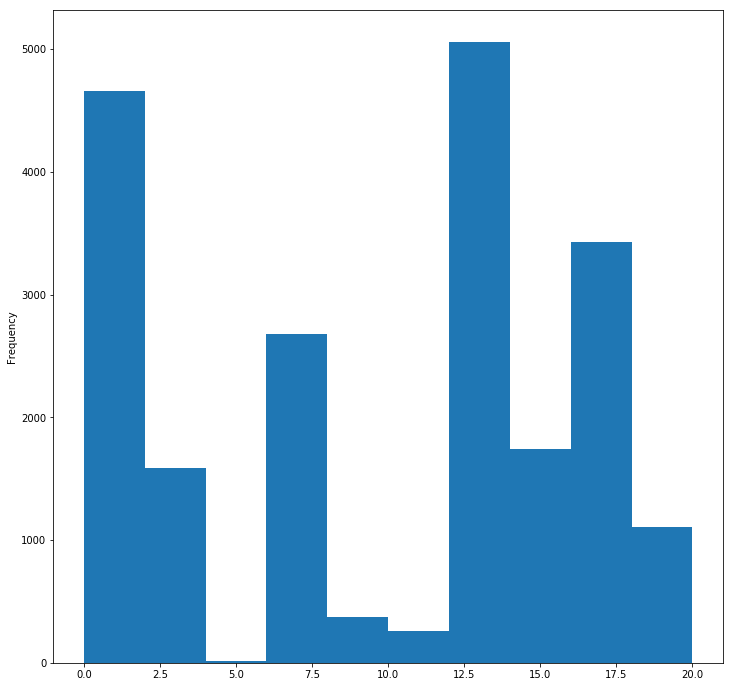

linear regression:  21415481.936528917
linear regression:  4627.68645616024
linear regression score:  0.13361094466512613
linear regression R2:  0.13361094466512613
Decision Tree:  10737941.812925953
Decision Tree:  3276.879889914483
Decision Tree score:  0.5655836608713904


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random forest:  9515652.390313957
Random forest:  3084.745109456202
Random forest score:  0.6150328482089067
Gradient boosting:  9515652.390313957
Gradient boosting:  3084.745109456202
Gradient boosting:  0.6421995834133021


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('BlackFriday.csv')
df = df.fillna(0)
print("+++ Point 0 +++ Org df after filling")
print(df.head(10))

df = pd.get_dummies(df, prefix_sep="__", columns=["Gender"], drop_first=True)
df = pd.get_dummies(df, prefix_sep="__", columns=["Marital_Status"], drop_first=True)
df = pd.get_dummies(df, prefix_sep="__", columns=["City_Category"],drop_first=True)
df = df.replace("4+", "4")
df['Age_Encoded'] = df['Age'].map({'0-17':15,'18-25':21,
                          '26-35':30,'36-45':40,
                          '46-50':48,'51-55':53,
                          '55+':60})
print("+++ Point 1 +++ After Get_dummies")
print(df.head(10))

df.drop(['User_ID', 'Product_ID', 'Age'], axis=1, inplace=True)
print("+++ Point 2 +++ df dropped")
print(df.head(10))
f, ax = plt.subplots(figsize=(12, 12))
# corr = df.corr()
# sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(100,200, as_cmap=True), square=True, ax=ax)
#plt.show()

df[df["Age_Encoded"] == 60]["Occupation"].plot(kind="hist")
plt.show()

###################### Start regression #################
X = df[['Occupation','Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Gender__M','City_Category__B', 'City_Category__C','Age_Encoded']]
# X = df[['Stay_In_Current_City_Years','Gender__M','City_Category__B', 'City_Category__C','Age_Encoded']]
Y = df['Purchase']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


################## liner regression #######################
regr = linear_model.LinearRegression()
fit_model = regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
print("linear regression: ", metrics.mean_squared_error(Y_test, predicted))
print("linear regression: ", np.sqrt(metrics.mean_squared_error(Y_test, predicted)))
print("linear regression score: ", regr.score(X_test, Y_test))
print("linear regression R2: ", r2_score(Y_test,predicted))


#################### decision tree ###################
dtr = DecisionTreeRegressor()
fit2 = dtr.fit(X_train,Y_train)
predicted2 = dtr.predict(X_test)
print("Decision Tree: ", metrics.mean_squared_error(Y_test, predicted2))
print("Decision Tree: ", np.sqrt(metrics.mean_squared_error(Y_test, predicted2)))
print("Decision Tree score: ",fit2.score(X_test,Y_test))

#################### random forest ###################
rfr = RandomForestRegressor()
fit3 = rfr.fit(X_train,Y_train)
predicted3 = rfr.predict(X_test)
print("Random forest: ", metrics.mean_squared_error(Y_test, predicted3))
print("Random forest: ", np.sqrt(metrics.mean_squared_error(Y_test, predicted3)))
print("Random forest score: ",fit3.score(X_test,Y_test))

#################### gradient boosting ###################
gbr = GradientBoostingRegressor()
fit4 = gbr.fit(X_train,Y_train)
predicted4 = rfr.predict(X_test)
print("Gradient boosting: ", metrics.mean_squared_error(Y_test, predicted4))
print("Gradient boosting: ", np.sqrt(metrics.mean_squared_error(Y_test, predicted4)))
print("Gradient boosting: ", fit4.score(X_test,Y_test))